# Hacktiv8 Introduction to Data Science - Sesi 7

Sesi 8:

- Advanced Visualization ( Visualisasi Menengah 1- Visualisasi menengah 2)

In [123]:
#library

import pandas as pd
import numpy as np

In [124]:
df_can = pd.read_excel('datasets/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [85]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [125]:
# create dataframe

df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

df_can['Total'] = df_can.sum(axis=1)

df_can.set_index('Country', inplace=True)  # DataFrame with the new index or Country

df_can.columns = list(map(str, df_can.columns))

years = list(map(str, range(1980, 2014)))

df_can.shape

(195, 38)

In [126]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [127]:
#1 compute propostion value
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])    #count total img
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']] 

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [128]:
#count waffle chart
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [129]:

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [130]:
#create empty matrix for waffle
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [131]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

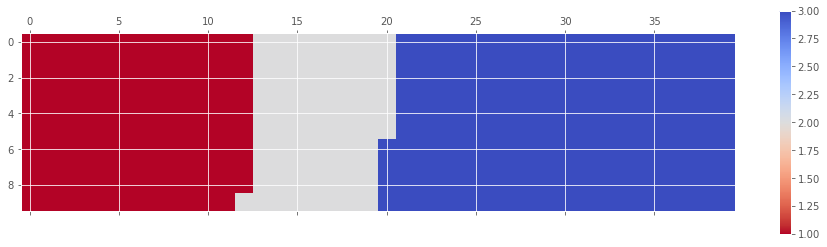

In [133]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
#colormap = plt.cm.coolwarm
colormap = plt.cm.coolwarm_r
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

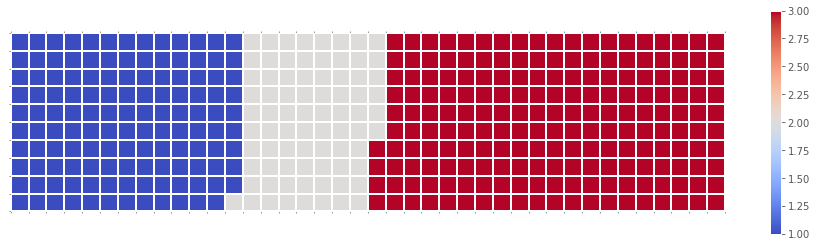

In [134]:
#make it better visual
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

In [95]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [135]:
df_can.reset_index(inplace=True) 

In [136]:
#become new file
df_can.to_csv('Canada_cleaned1.csv', index=False)  #dataframe to new csv file with no mentionn index

In [137]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [99]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

## WordClouds

In [100]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [138]:
from wordcloud import WordCloud, STOPWORDS

In [139]:
alice_novel = open('datasets/alice_novel.txt', 'r').read()

In [140]:
#stipwords = uncount words
stopwords = set(STOPWORDS)

In [151]:
print(STOPWORDS)

{'when', 'own', 'from', 'its', "we'd", 'between', 'each', 'his', 'or', 'our', 'why', 'whom', 'itself', "he's", 'they', 'few', 'other', 'www', 'said', 'have', 'for', "i'll", 'an', 'myself', 'most', 'as', 'what', 'all', 'are', 'yours', "they're", 'before', 'that', "hasn't", 'and', 'to', "we're", 'under', 'during', 'ours', 'them', 'am', 'having', 'into', 'on', 'do', 'once', 'if', "i've", 'being', 'doing', 'while', 'through', 'ourselves', 'off', 'same', "didn't", 'out', "you're", 'could', 'can', 'but', 'http', 'i', 'by', 'your', 'those', 'she', "she's", 'some', 'ought', 'above', 'is', "how's", 'themselves', 'who', 'it', "what's", "he'd", "shouldn't", 'of', 'too', 'shall', 'then', 'so', 'their', 'at', 'himself', 'like', "doesn't", 'you', 'in', 'this', "i'm", "mustn't", 'which', 'else', 'has', "that's", 'her', 'r', 'him', 'get', 'how', "haven't", "let's", "when's", "why's", 'be', 'further', "they'll", 'down', 'me', 'he', 'theirs', 'com', "isn't", 'would', 'than', "we've", 'should', 'just', '

In [147]:
#add 'said' to stopwords
stopwords.add('said')

In [148]:
print(stopwords)

{'when', 'own', 'from', 'its', "we'd", 'between', 'each', 'his', 'or', 'our', 'why', 'whom', 'itself', "he's", 'they', 'few', 'other', 'www', 'said', 'have', 'for', "i'll", 'an', 'myself', 'most', 'as', 'what', 'all', 'are', 'yours', "they're", 'before', 'that', "hasn't", 'and', 'to', "we're", 'under', 'during', 'ours', 'them', 'am', 'having', 'into', 'on', 'do', 'once', 'if', "i've", 'being', 'doing', 'while', 'through', 'ourselves', 'off', 'same', "didn't", 'out', "you're", 'could', 'can', 'but', 'http', 'i', 'by', 'your', 'those', 'she', "she's", 'some', 'ought', 'above', 'is', "how's", 'themselves', 'who', 'it', "what's", "he'd", "shouldn't", 'of', 'too', 's', 'shall', 'then', 'so', 'their', 'at', 'himself', 'like', "doesn't", 'you', 'in', 'this', "i'm", "mustn't", 'which', 'else', 'has', "that's", 'her', 'd', 'r', 'him', 'get', 'how', "haven't", "let's", "when's", "why's", 'be', 'further', "they'll", 'down', 'me', 'he', 'theirs', 'com', "isn't", 'would', 'than', "we've", 'should',

In [154]:
#generate word visualize in alice novel

alice_wc = WordCloud(
    background_color='white', #warna
    stopwords=stopwords,        #stopwords
    max_words=2000              #maximum
)

alice_wc.generate(alice_novel)

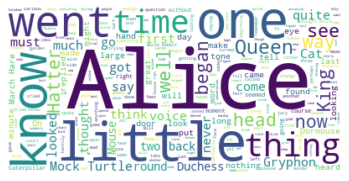

In [155]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

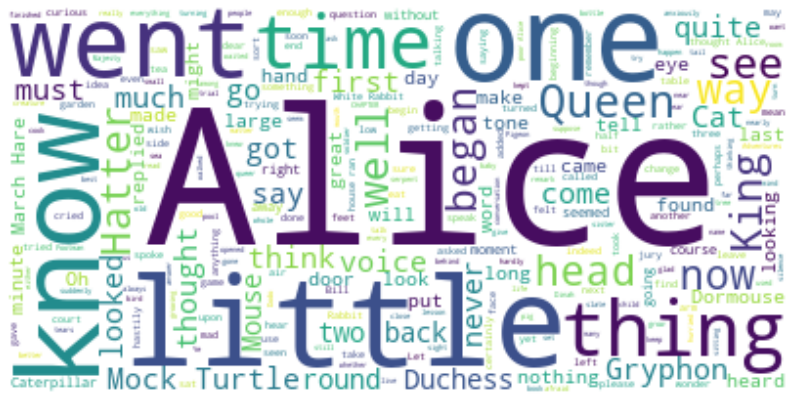

In [156]:
#create the figure
fig = plt.figure()
fig.set_figwidth(14)    #ukuran
fig.set_figheight(18)   #ukuran

#call out figure
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

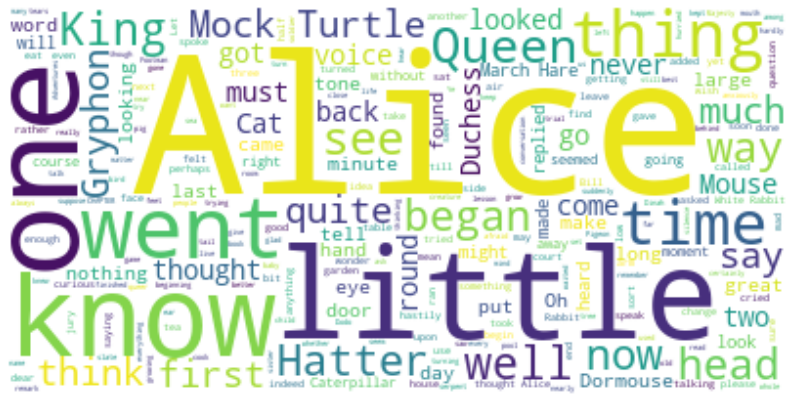

In [107]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [108]:
# for image 
from PIL import Image
alice_mask = np.array(Image.open('datasets/alice_mask.png'))    # data image alice

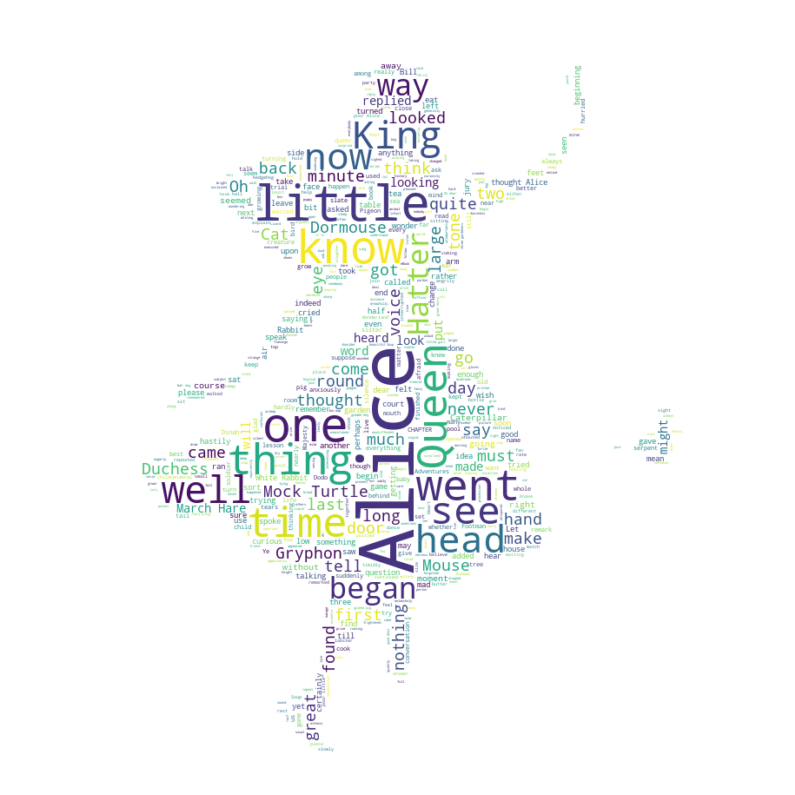

In [157]:
#create visualize with mask image
alice_wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=2000,
    mask=alice_mask
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [163]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [167]:
df_can.reset_index(inplace=False) 

,level_0,index,Country,Continent,Region,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,2,2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,3,3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,...,0,1,0,0,0,0,0,0,0,6
4,4,4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,191,191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,192,192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,...,161,140,122,133,128,211,160,174,217,2985
193,193,193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,...,91,77,71,64,60,102,69,46,59,1677


In [168]:
total_immigration = df_can['Total'].sum()

max_words = 10000
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(''))== 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

AttributeError: 'numpy.int64' object has no attribute 'split'

In [122]:
wordcloud = WordCloud(background_color='white').generate(word_string)

ValueError: We need at least 1 word to plot a word cloud, got 0.

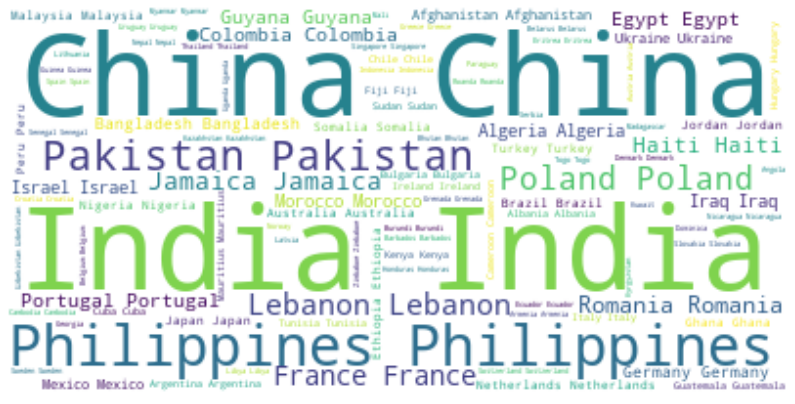

In [ ]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [169]:
import seaborn as sns

## Regression Plot with Seaborn

In [170]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


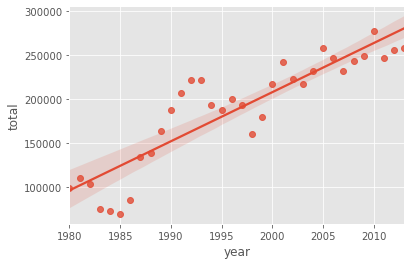

In [171]:
#plot menggunakan persamaan regression
ax = sns.regplot(x='year', y='total', data=df_tot)

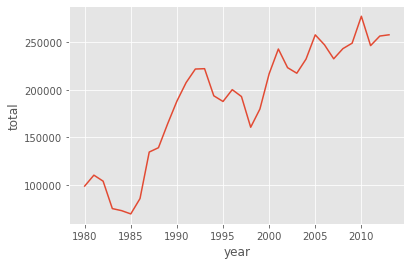

In [172]:
#menggunakan persamaan linear
ax = sns.lineplot(x='year', y='total', data=df_tot)

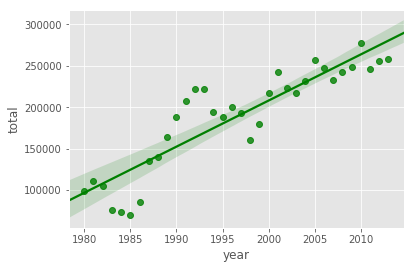

In [ ]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

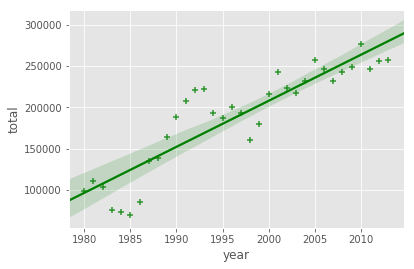

In [ ]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

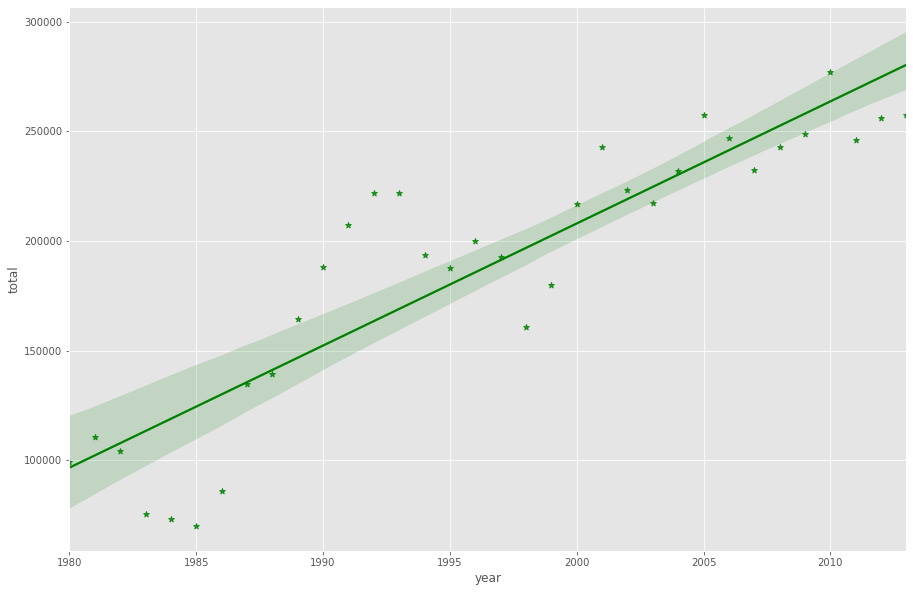

In [173]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='*')

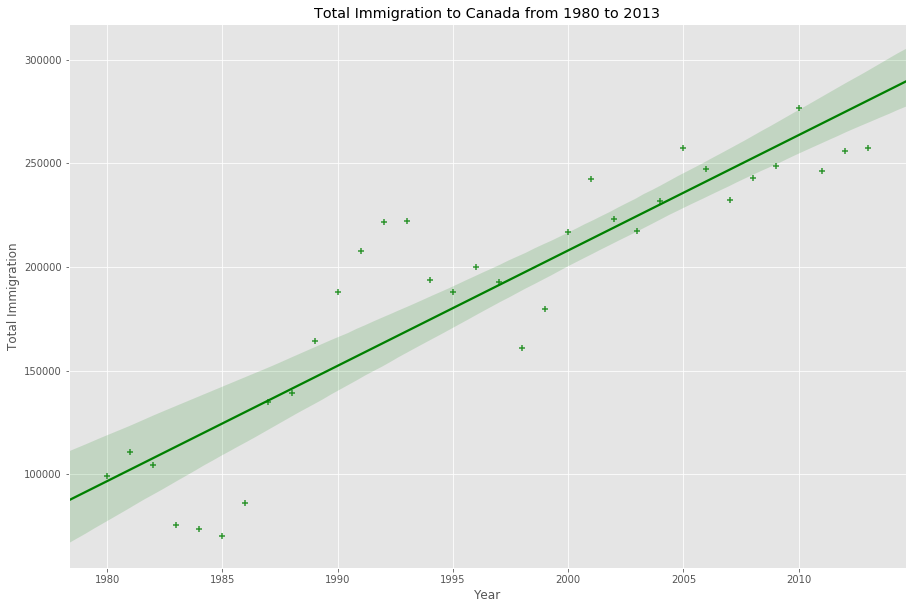

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 to 2013')

plt.show()

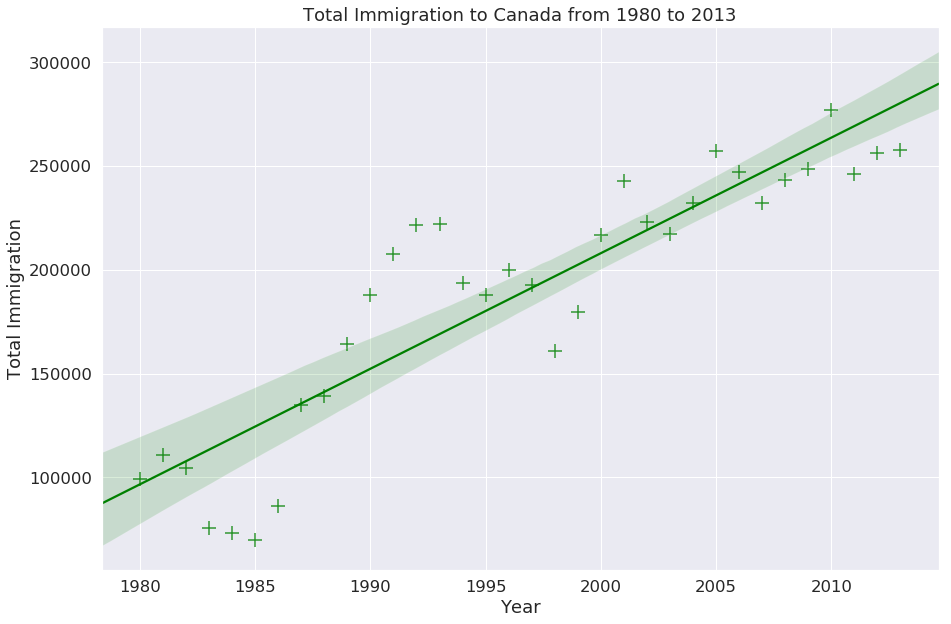

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 to 2013')

plt.show()

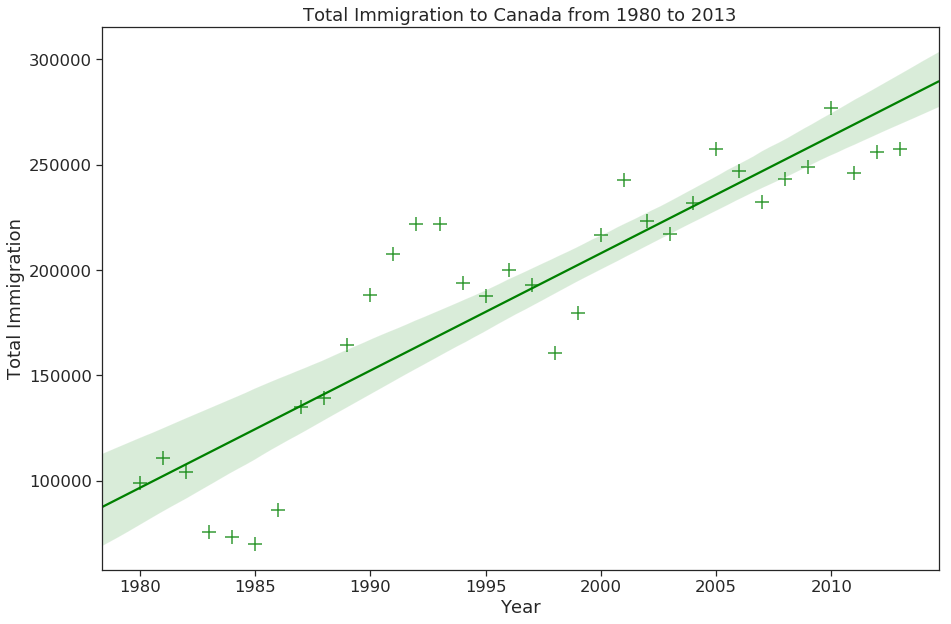

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 to 2013')

plt.show()

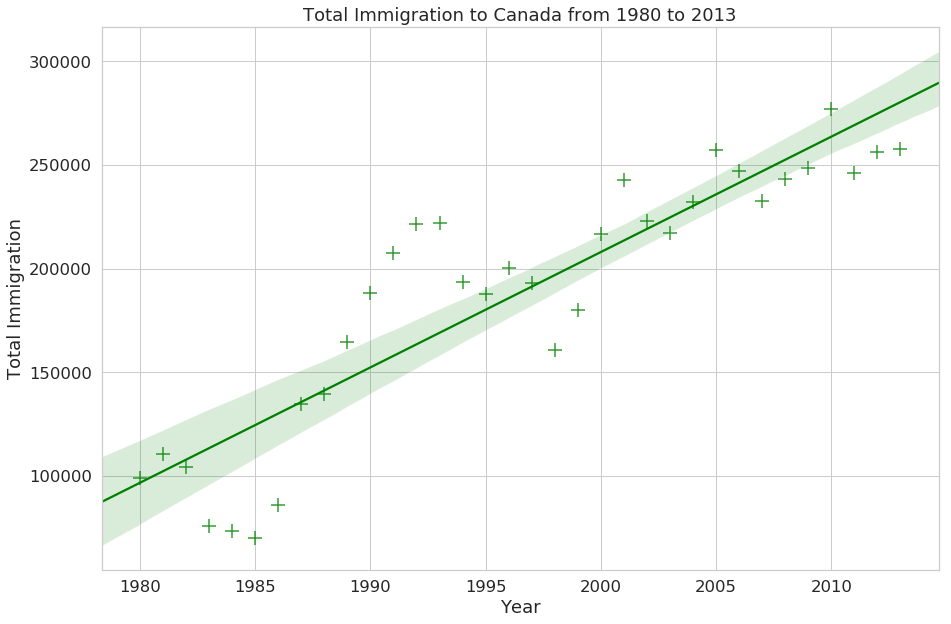

In [ ]:
#set plot 
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 to 2013')

plt.show()

## Folium

In [174]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [175]:
import folium

In [176]:
world_map = folium.Map()

In [177]:
world_map

In [178]:
#select location by latittude, longtittude
world_map = folium.Map(location=[-7.0247246,110.3470246], zoom_start=8)

world_map

In [181]:
world_map = folium.Map(location=[-7.0247246,110.3470246], zoom_start=10)

world_map

In [182]:
#prov jakarta
jkt_map= folium.Map(location=[-6.200000,106.816666])
jkt_map

In [ ]:
jk_map = folium.Map(location=[-6.2607134,106.7794275], zoom_start=15, tiles='Stamen Water Color')

world_map

In [ ]:
world_map = folium.Map(location=[-7.0247246,110.3470246], zoom_start=12, tiles='Stamen Toner')

world_map

In [ ]:
world_map = folium.Map(location=[-7.0247246,110.3470246], zoom_start=12, tiles='Stamen Terrain')

world_map

In [ ]:
world_map = folium.Map(location=[-6.2607134,106.7794275], zoom_start=15, tiles='Stamen Terrain')

world_map

## Maps With Marker

In [183]:
df_incidents = pd.read_csv('datasets/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [184]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [185]:
df_incidents.shape

(150500, 13)

In [186]:
#make limit
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [187]:
# set latitude and longtidute
latitude = 37.77
longitude = -122.42

In [188]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=13)

sanfran_map

In [189]:
#from folium create grouping
incidents = folium.map.FeatureGroup()

In [204]:
#coloring  and loop incidents
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,           #berasaran radius
            color='red',
            fill='True',
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [205]:
sanfran_map.add_child(incidents)

In [192]:
incidents = folium.map.FeatureGroup()

In [ ]:
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill='True',
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

In [ ]:
sanfran_map.add_child(incidents)

In [ ]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [ ]:
from folium import plugins

In [193]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label
    ).add_to(incidents)
    
sanfran_map

## Choropleth Maps

In [194]:
df_can.head()

,index,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [195]:
df_can.reset_index(inplace=True)

In [196]:
world_geo = r'datasets/world_countries.json'

In [197]:
#world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='https://api.mapbox.com/v4/mapbox.streets/{z}/{x}/{y}.png?access_token=mytoken',
   attr='Mapbox attribution')

In [198]:
world_map.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

/Users/prast/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [199]:
world_map

In [200]:
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [201]:

cov_map = folium.Map(location=[0, 0], zoom_start=2, tiles='https://api.mapbox.com/v4/mapbox.streets/{z}/{x}/{y}.png?access_token=mytoken',
   attr='Mapbox attribution')